In [1]:
using Plots
using DataFrames
using Statistics
using Polynomials
using CSV

In [2]:
function naive_multiplication(A,B)
    C=zeros(Float64,size(A,1),size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j]=C[i,j]+A[i,k]*B[k,j]
            end
        end
    end
    return(C)
end

naive_multiplication (generic function with 1 method)

In [3]:
function better_multiplication( A,B )
    C=zeros(Float64,size(A,1),size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j]=C[i,j]+A[i,k]*B[k,j]
            end
        end
    end
    return(C)
end

better_multiplication (generic function with 1 method)

In [4]:
Asmall=[[1.0 0.0]; [0.0 1.0]]
Bsmall=Asmall
naive_multiplication(Asmall, Bsmall)
better_multiplication(Asmall, Bsmall)
Asmall*Bsmall
A=rand(1000,1000);
B=rand(1000,1000);

In [5]:
@elapsed naive_multiplication(A, B)

3.967079416

In [6]:
@elapsed better_multiplication(A, B)

1.753769163

In [7]:
@elapsed A * B

0.055194626

In [8]:
naive = []
better = []
blas = []

data = DataFrame(size = Int[], naive = Float64[], better = Float64[], blas = Float64[])

range = 10:10:250
for size = range
    for i = 1:10
        m1 = rand(size, size)
        m2 = rand(size, size)
        naive = @elapsed naive_multiplication(m1, m2)
        better = @elapsed better_multiplication(m1, m2)
        blas = @elapsed m1 * m2
        push!(data, [size naive better blas])
    end
end

In [9]:
processed = by(data, :size, df->DataFrame(naive_avg=mean(df[:naive]),
        naive_std=std(df[:naive]), better_avg=mean(df[:better]),
        better_std=std(df[:better]), blas_avg=mean(df[:blas]), blas_std=std(df[:blas])))

,size,naive_avg,naive_std,better_avg,better_std,blas_avg,blas_std
,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,10,3.0871e-6,6.09939e-7,2.5838e-6,5.1357e-7,2.7309e-6,4.45755e-6
2,20,2.39724e-5,9.55989e-8,1.55786e-5,9.19628e-8,2.177e-6,3.6034e-7
3,30,8.65198e-5,6.52961e-7,5.08965e-5,2.8062e-6,5.3097e-6,5.56061e-7
4,40,0.000218779,4.2557e-6,0.00012875,7.79388e-7,8.3461e-6,2.41111e-7
5,50,0.000427659,8.37708e-6,0.000217742,2.9092e-6,1.68781e-5,4.18758e-6
6,60,0.000737992,2.11899e-6,0.00037152,1.73285e-6,2.4701e-5,8.12922e-7
7,70,0.00138945,6.40785e-5,0.000652634,2.39272e-5,5.12574e-5,2.83907e-5
8,80,0.00213292,4.26308e-7,0.00105041,3.33782e-6,4.38911e-5,3.94729e-6
9,90,0.00303688,2.26079e-6,0.00139413,5.99653e-6,5.54509e-5,3.51415e-6


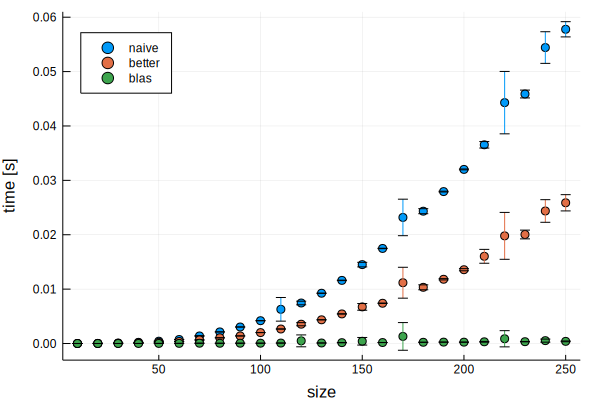

In [10]:
scatter(processed[:size], [processed[:naive_avg], processed[:better_avg], processed[:blas_avg]],
    yerr=[processed[:naive_std] processed[:better_std] processed[:blas_std]], layout=1,
    xlabel="size", ylabel="time [s]", labels=["naive" "better" "blas"], legend=:topleft)

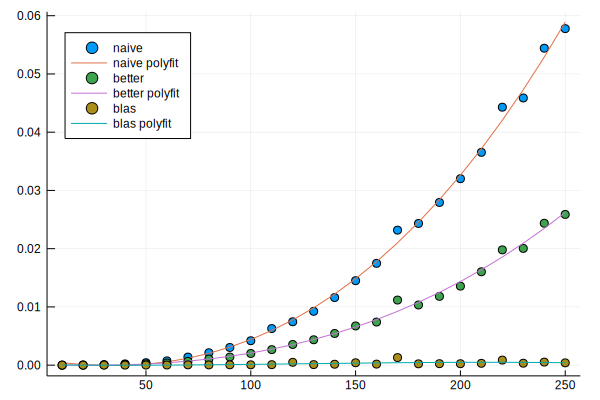

In [11]:
naive_poly = polyfit(processed[:size], processed[:naive_avg], 3)
better_poly = polyfit(processed[:size], processed[:better_avg], 3)
blas_poly = polyfit(processed[:size], processed[:blas_avg], 3)

naive_p = [naive_poly(x) for x = processed[:size]]
better_p = [better_poly(x) for x = processed[:size]]
blas_p = [blas_poly(x) for x = processed[:size]]


scatter(processed[:size], processed[:naive_avg], legend=:topleft, label="naive")
plot!(processed[:size], naive_p, label="naive polyfit")
scatter!(processed[:size], processed[:better_avg], label="better")
plot!(processed[:size], better_p, label="better polyfit")
scatter!(processed[:size], processed[:blas_avg], label="blas")
plot!(processed[:size], blas_p, label="blas polyfit")

In [12]:
data = CSV.read("results.csv")

,size,naive,better,blas
,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,10,6378,6085,1428
2,10,6353,5982,1141
3,10,6330,6028,1080
4,10,6303,6032,1072
5,10,6273,5965,1095
6,10,6794,5975,1098
7,10,6366,6011,1086
8,10,6237,6024,1079
9,10,6305,5994,1085


In [13]:
processed = by(data, :size, df->DataFrame(naive_avg=mean(df[:naive]),
        naive_std=std(df[:naive]), better_avg=mean(df[:better]),
        better_std=std(df[:better]), blas_avg=mean(df[:blas]), blas_std=std(df[:blas])))

,size,naive_avg,naive_std,better_avg,better_std,blas_avg,blas_std
,Int64⍰,Float64,Float64,Float64,Float64,Float64,Float64
1,10,6355.9,162.641,6011.5,34.9261,1123.2,109.027
2,20,54778.7,7013.95,51813.3,4003.45,11121.0,696.073
3,30,2.08057e5,47687.5,1.91853e5,32092.7,34375.0,7879.43
4,40,5.37053e5,66583.4,5.20043e5,63991.9,1.04937e5,11557.0
5,50,1.7872e6,406497.0,1.71825e6,382029.0,3.01833e5,66252.8
6,60,3.56924e6,7.31552e5,3.25074e6,7.42909e5,5.28528e5,1.34554e5
7,70,2.25189e6,2.96742e5,2.08982e6,1.23655e5,3.78012e5,22970.4
8,80,3.17871e6,69843.7,3.09003e6,79109.6,5.21991e5,20030.6
9,90,4.63833e6,2.09437e5,4.39353e6,1.34129e5,7.321e5,30850.7


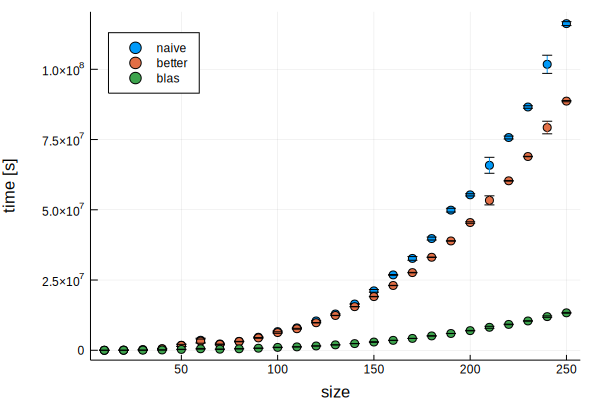

In [14]:
scatter(processed[:size], [processed[:naive_avg], processed[:better_avg], processed[:blas_avg]],
    yerr=[processed[:naive_std] processed[:better_std] processed[:blas_std]], layout=1,
    xlabel="size", ylabel="time [s]", labels=["naive" "better" "blas"], legend=:topleft)

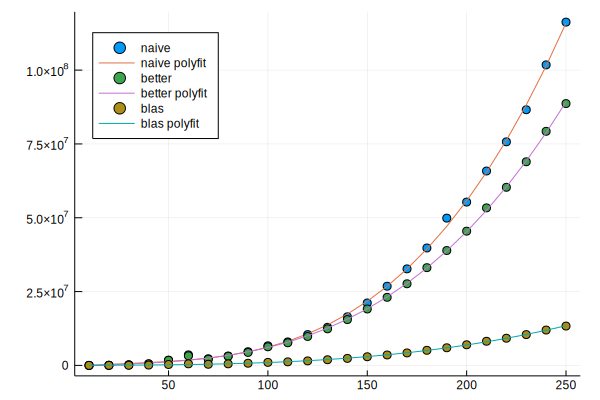

In [15]:
naive_poly = polyfit(processed[:size], processed[:naive_avg], 3)
better_poly = polyfit(processed[:size], processed[:better_avg], 3)
blas_poly = polyfit(processed[:size], processed[:blas_avg], 3)

naive_p = [naive_poly(x) for x = processed[:size]]
better_p = [better_poly(x) for x = processed[:size]]
blas_p = [blas_poly(x) for x = processed[:size]]


scatter(processed[:size], processed[:naive_avg], legend=:topleft, label="naive")
plot!(processed[:size], naive_p, label="naive polyfit")
scatter!(processed[:size], processed[:better_avg], label="better")
plot!(processed[:size], better_p, label="better polyfit")
scatter!(processed[:size], processed[:blas_avg], label="blas")
plot!(processed[:size], blas_p, label="blas polyfit")